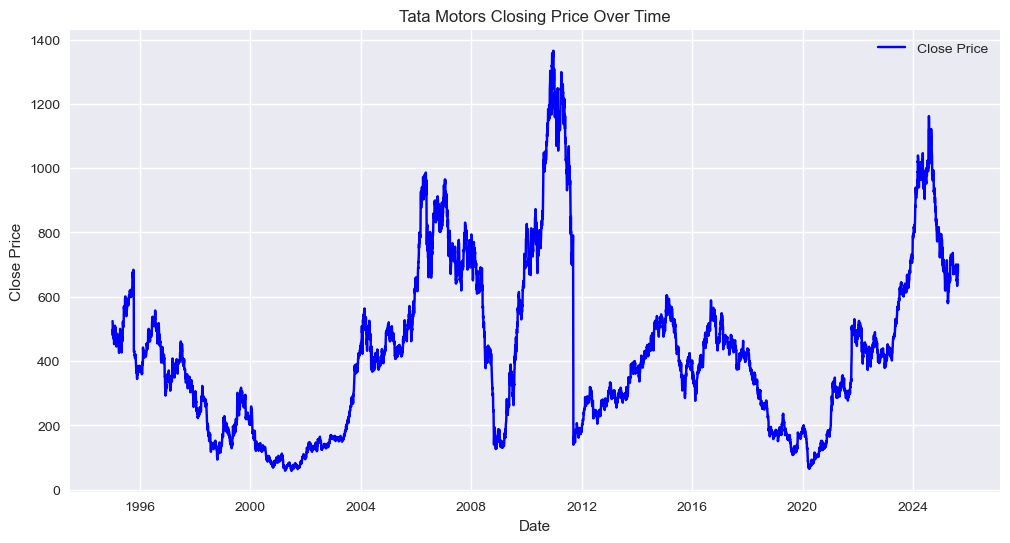

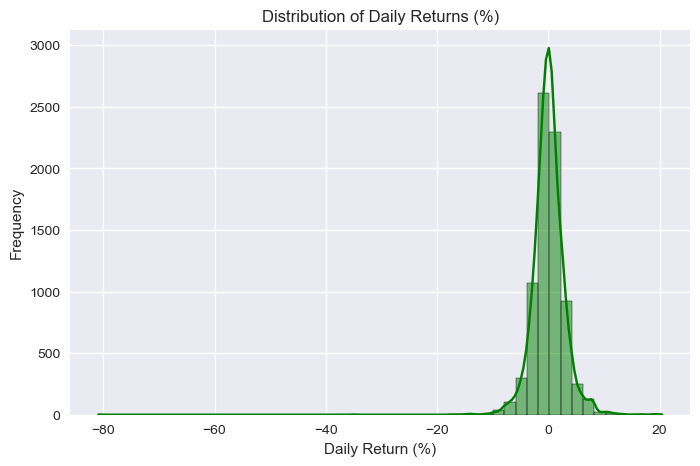

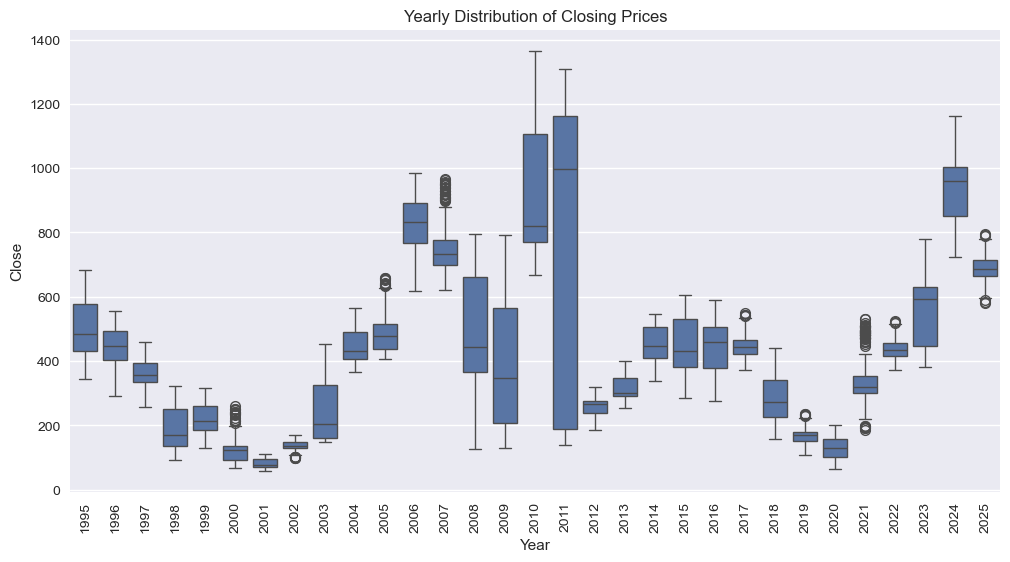

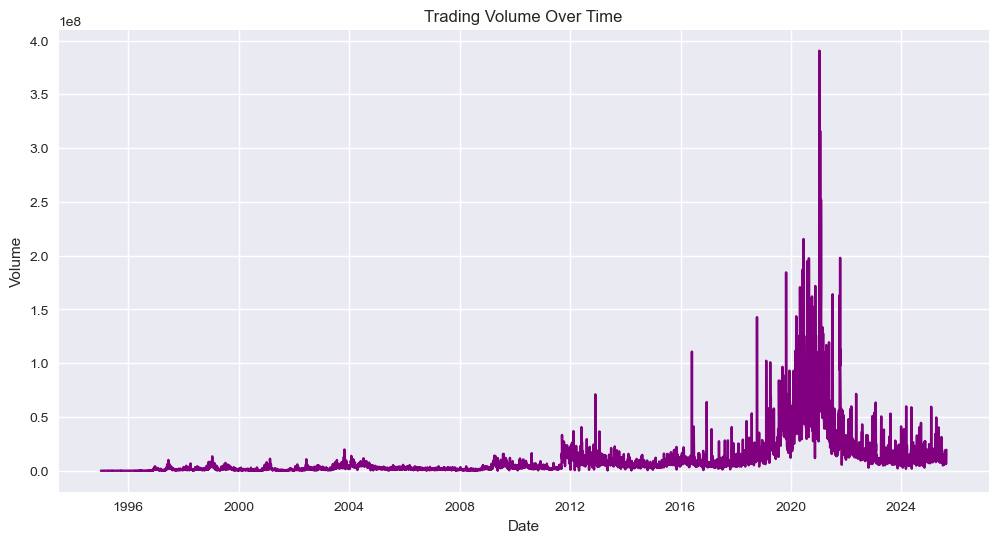

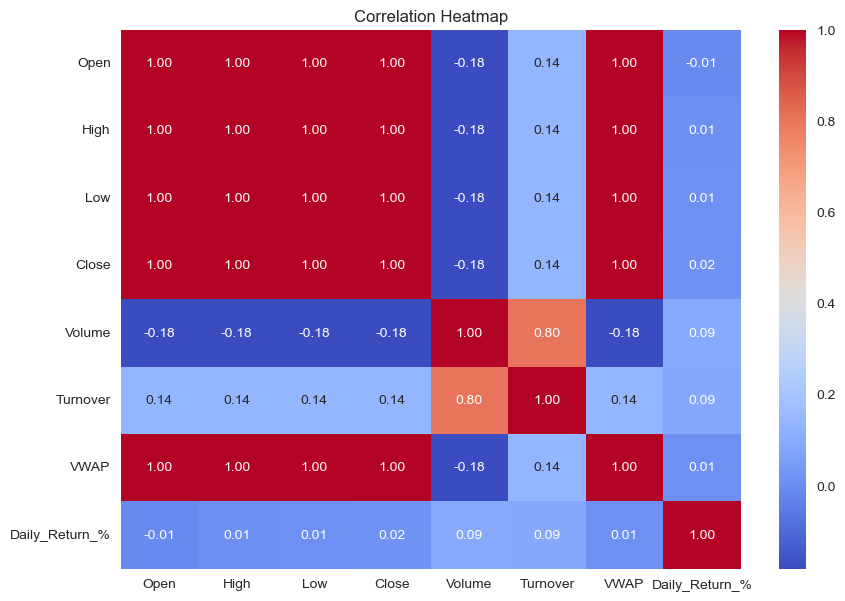

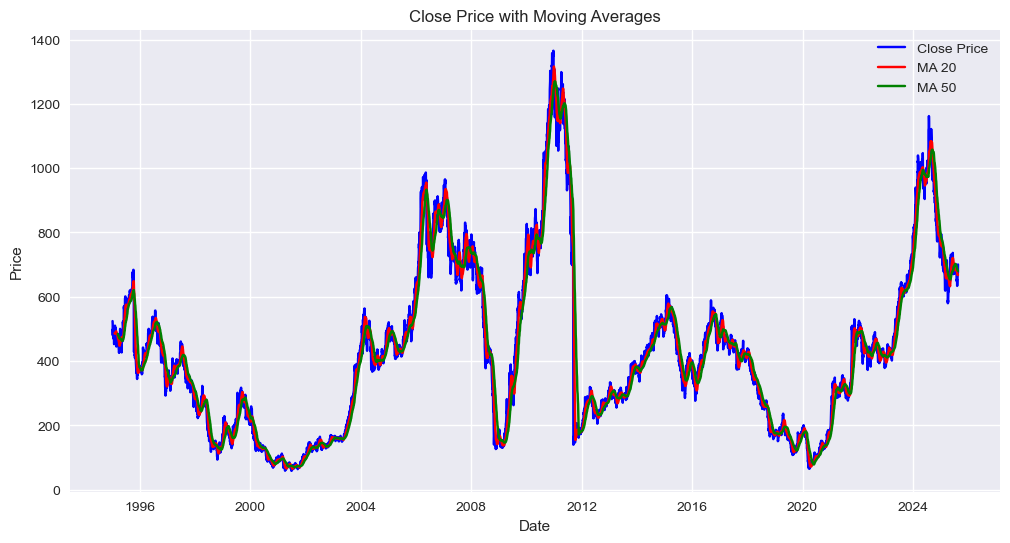

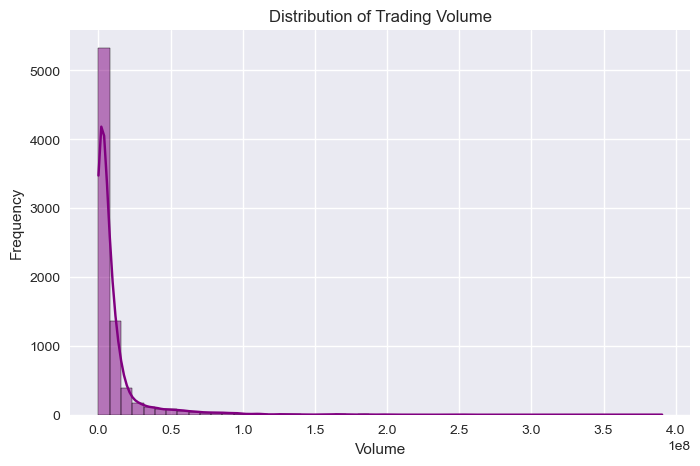

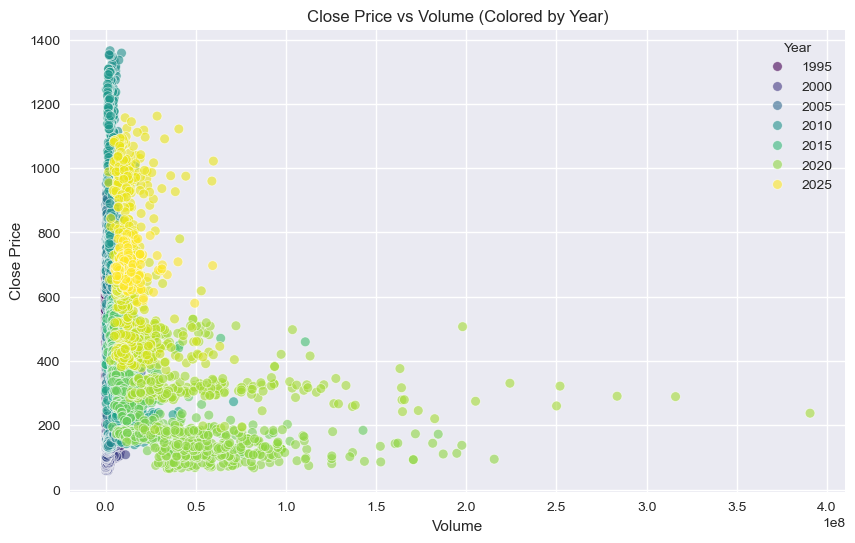

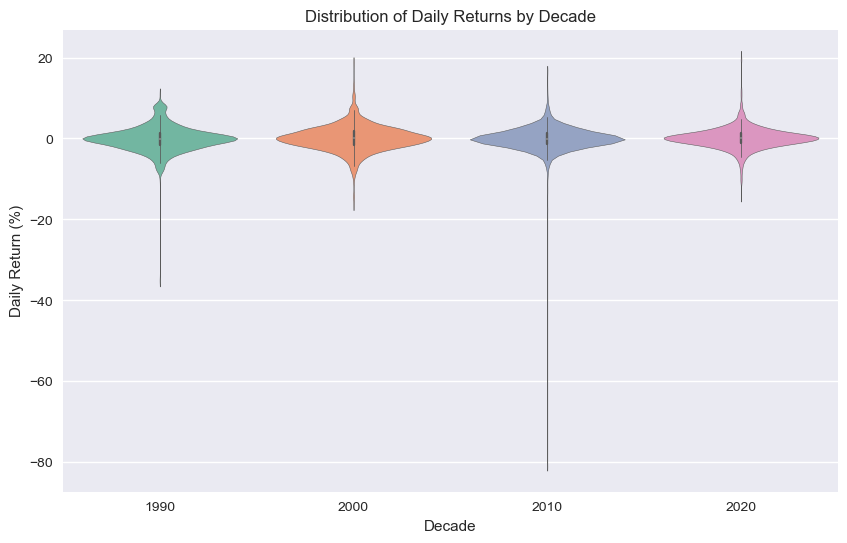

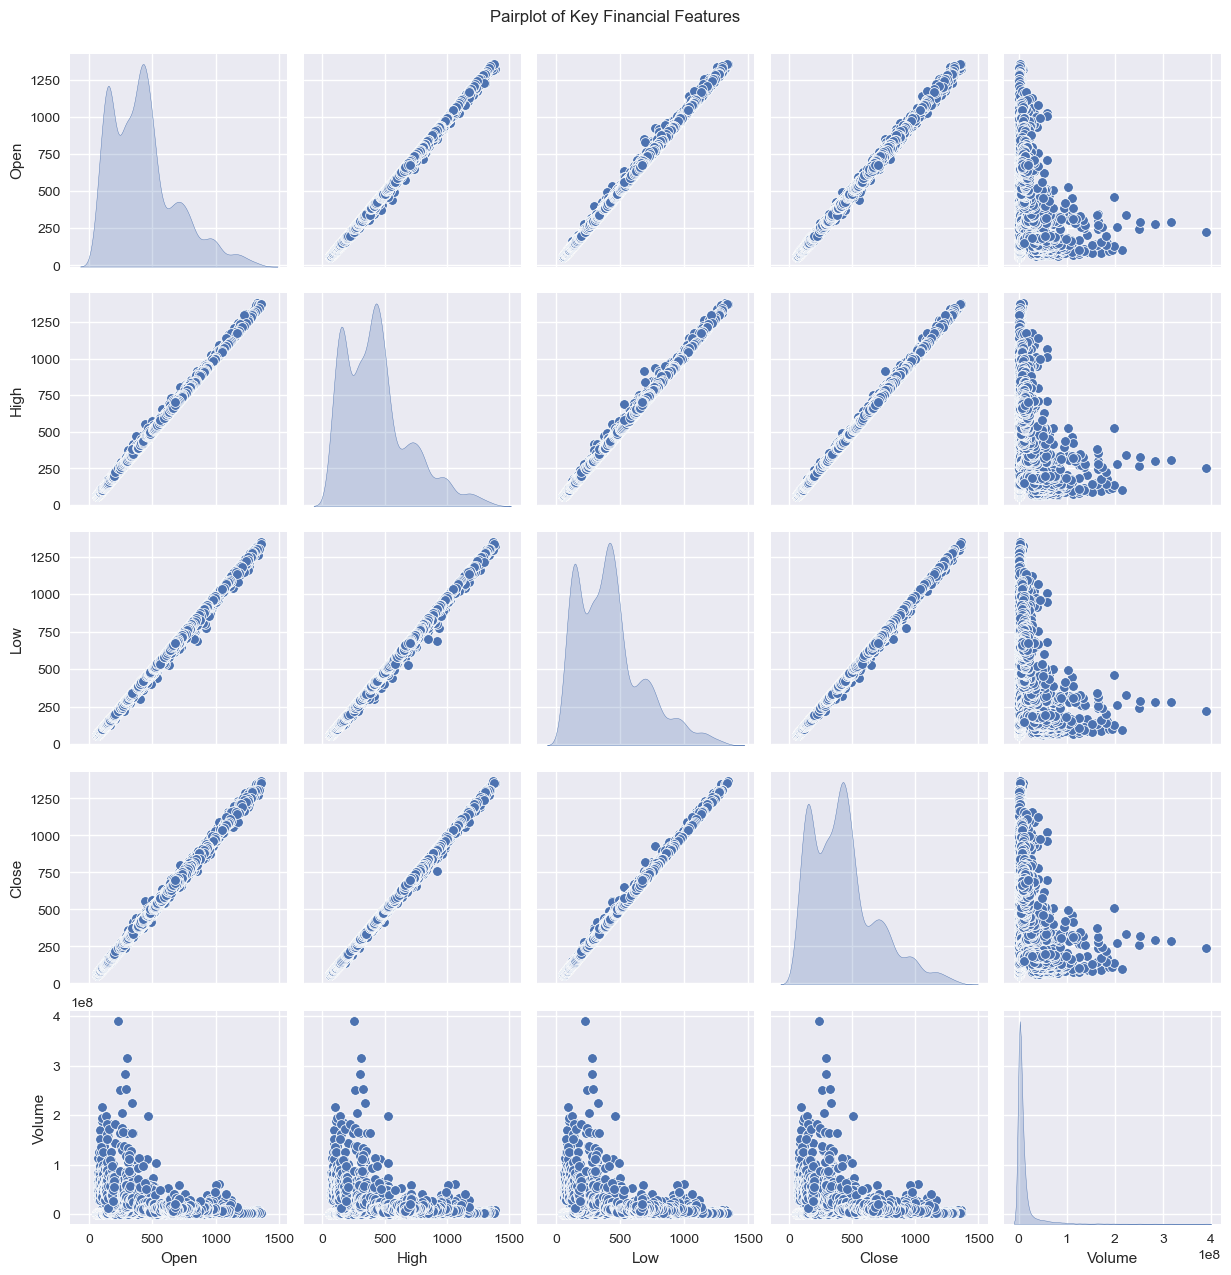

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = "TATAMOTORS_NSE_1995-2025.csv"
df = pd.read_csv(file_path)

# --- Data Cleaning ---
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["MA_20"].fillna(method="ffill", inplace=True)
df["MA_50"].fillna(method="ffill", inplace=True)
df.dropna(subset=["Open", "High", "Low", "Close", "Volume"], inplace=True)
df.reset_index(drop=True, inplace=True)

# Add Year and Decade for visualization
df["Year"] = df["Date"].dt.year
df["Decade"] = (df["Year"] // 10) * 10

# 1. Drop unnecessary column
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# 2. Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 3. Fill missing values in Moving Averages (forward fill)
df["MA_20"].fillna(method="ffill", inplace=True)
df["MA_50"].fillna(method="ffill", inplace=True)

# 4. Drop rows with missing critical values
df.dropna(subset=["Open", "High", "Low", "Close", "Volume"], inplace=True)

# 5. Reset index
df.reset_index(drop=True, inplace=True)

# Add Year column for boxplot
df["Year"] = df["Date"].dt.year

# --- Data Visualization ---

plt.style.use("seaborn-v0_8")

# 1. Line plot of Close price over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close Price", color="blue")
plt.title("Tata Motors Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# 2. Distribution of Daily Returns
plt.figure(figsize=(8,5))
sns.histplot(df["Daily_Return_%"], bins=50, kde=True, color="green")
plt.title("Distribution of Daily Returns (%)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.show()

# 3. Boxplot of Closing Price by Year
plt.figure(figsize=(12,6))
sns.boxplot(x="Year", y="Close", data=df)
plt.title("Yearly Distribution of Closing Prices")
plt.xticks(rotation=90)
plt.show()

# 4. Volume traded over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Volume"], color="purple")
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10,7))
corr = df[["Open","High","Low","Close","Volume","Turnover","VWAP","Daily_Return_%"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 1. Lineplot of Close Price with Moving Averages
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Close", data=df, label="Close Price", color="blue")
sns.lineplot(x="Date", y="MA_20", data=df, label="MA 20", color="red")
sns.lineplot(x="Date", y="MA_50", data=df, label="MA 50", color="green")
plt.title("Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# 2. Histogram of Trading Volume
plt.figure(figsize=(8,5))
sns.histplot(df["Volume"], bins=50, kde=True, color="purple")
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

# 3. Scatterplot of Close vs Volume (colored by Year)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Volume", y="Close", hue="Year", data=df, palette="viridis", alpha=0.6)
plt.title("Close Price vs Volume (Colored by Year)")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

# 4. Violinplot of Daily Returns by Decade
plt.figure(figsize=(10,6))
sns.violinplot(x="Decade", y="Daily_Return_%", data=df, palette="Set2")
plt.title("Distribution of Daily Returns by Decade")
plt.xlabel("Decade")
plt.ylabel("Daily Return (%)")
plt.show()

# 5. Pairplot of Key Features
sns.pairplot(df[["Open","High","Low","Close","Volume"]], diag_kind="kde")
plt.suptitle("Pairplot of Key Financial Features", y=1.02)
plt.show()


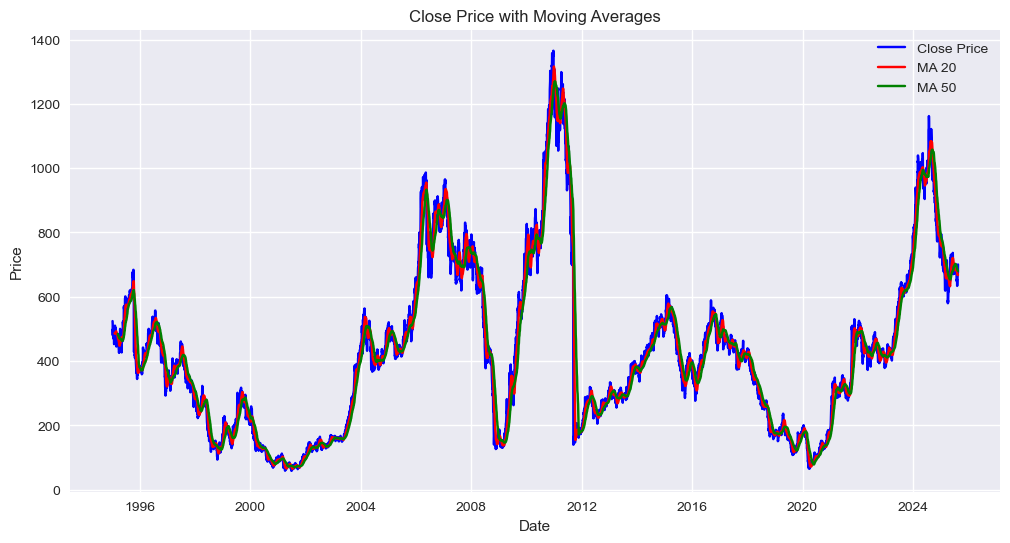

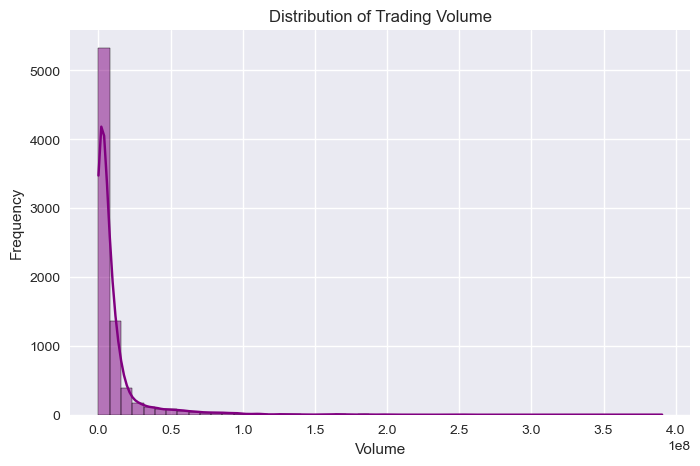

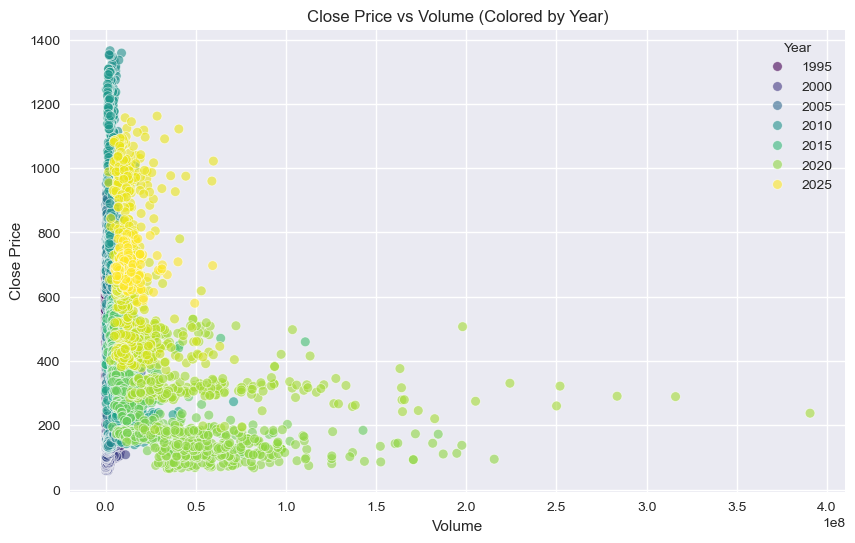

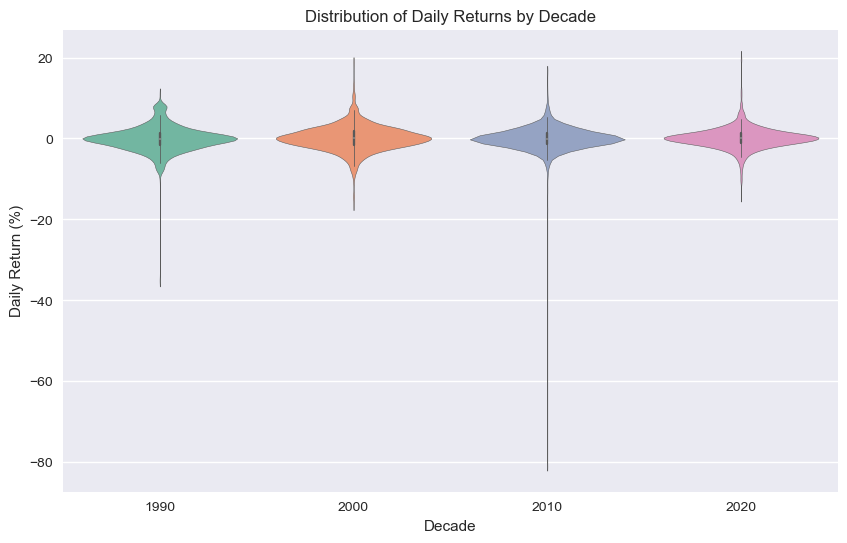

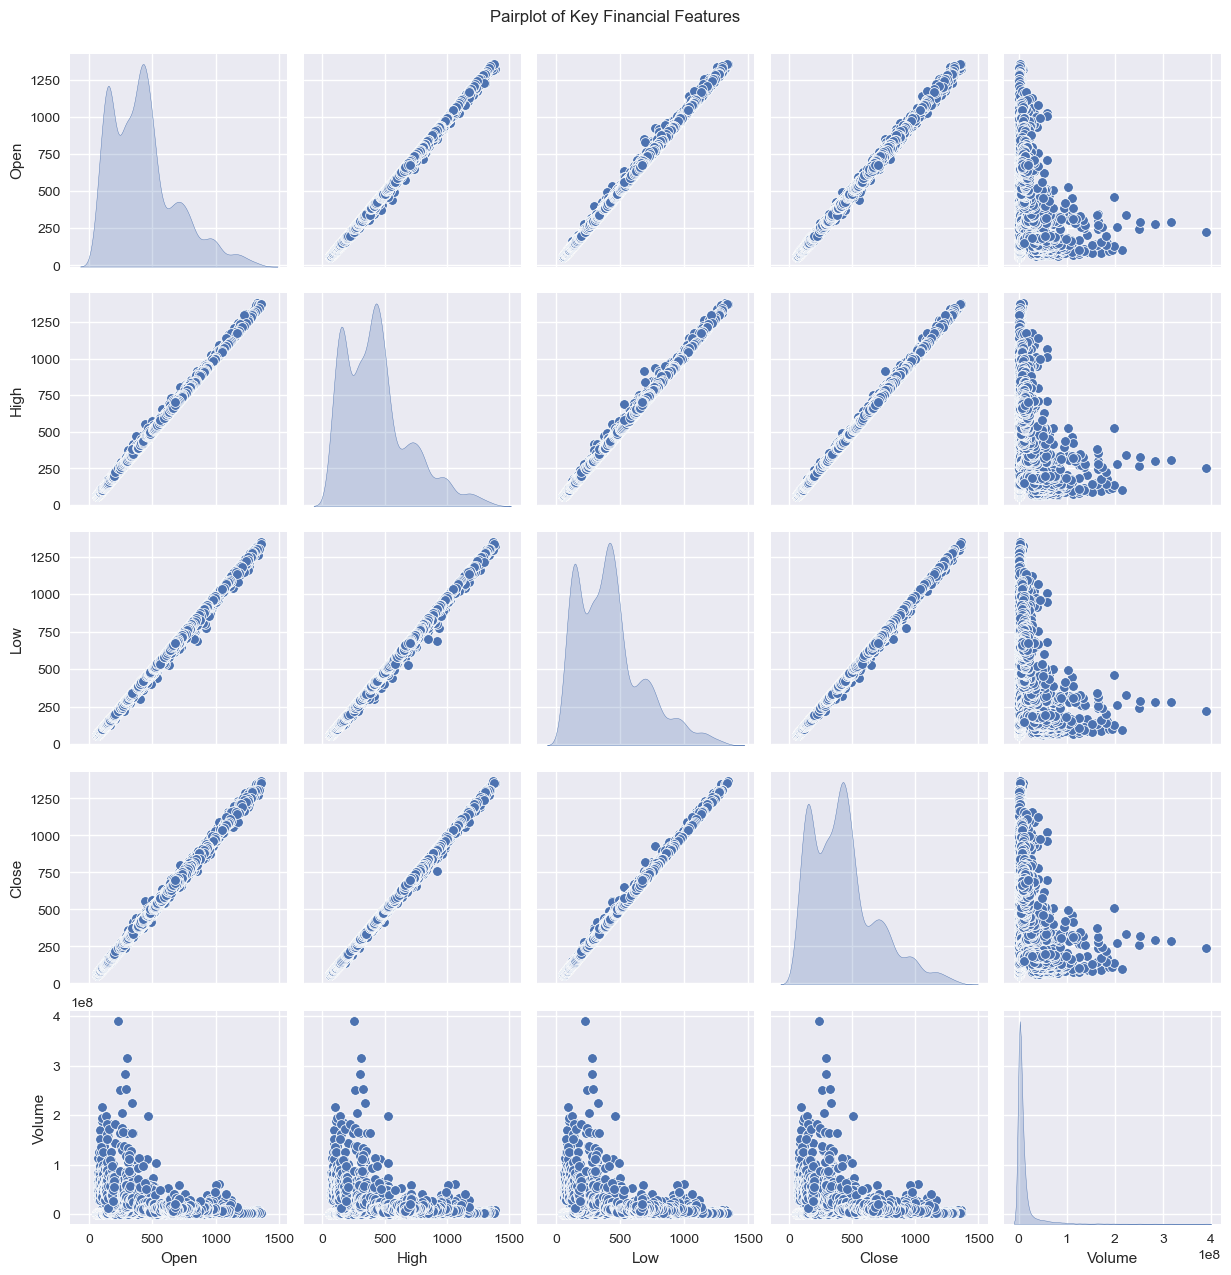

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "TATAMOTORS_NSE_1995-2025.csv"
df = pd.read_csv(file_path)

# --- Data Cleaning ---
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["MA_20"].fillna(method="ffill", inplace=True)
df["MA_50"].fillna(method="ffill", inplace=True)
df.dropna(subset=["Open", "High", "Low", "Close", "Volume"], inplace=True)
df.reset_index(drop=True, inplace=True)

# Add Year and Decade for visualization
df["Year"] = df["Date"].dt.year
df["Decade"] = (df["Year"] // 10) * 10

# --- 5 Seaborn Visualizations ---

# 1. Lineplot of Close Price with Moving Averages
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Close", data=df, label="Close Price", color="blue")
sns.lineplot(x="Date", y="MA_20", data=df, label="MA 20", color="red")
sns.lineplot(x="Date", y="MA_50", data=df, label="MA 50", color="green")
plt.title("Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# 2. Histogram of Trading Volume
plt.figure(figsize=(8,5))
sns.histplot(df["Volume"], bins=50, kde=True, color="purple")
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

# 3. Scatterplot of Close vs Volume (colored by Year)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Volume", y="Close", hue="Year", data=df, palette="viridis", alpha=0.6)
plt.title("Close Price vs Volume (Colored by Year)")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

# 4. Violinplot of Daily Returns by Decade
plt.figure(figsize=(10,6))
sns.violinplot(x="Decade", y="Daily_Return_%", data=df, palette="Set2")
plt.title("Distribution of Daily Returns by Decade")
plt.xlabel("Decade")
plt.ylabel("Daily Return (%)")
plt.show()

# 5. Pairplot of Key Features
sns.pairplot(df[["Open","High","Low","Close","Volume"]], diag_kind="kde")
plt.suptitle("Pairplot of Key Financial Features", y=1.02)
plt.show()
